# 1

Pandas 함수로 2개 데이터 파일을 읽고 합쳐서 1개의 데이터프레임 변수명 df에 할당하는 코드를 작성하세요.

cancer_patient_a.csv파일을 읽어 데이터프레임 변수명 df_a에 할당하세요.
cancer_aptient_b.csv 파일을 읽어 데이터 프레임 변수명 df_b에 할당하세요.
df_a, df_b를 합쳐서 하나의 데이터프레임으로 만드세요. 판다스의 merge를 활용하세요
기준 열 (on) : 'Patient Id'
합치는 방법(how) : 'inner'

In [2]:
import pandas as pd

df_a = pd.read_csv('C:\\Pandas_study\\pandas\\cancer_patient_a.csv')
df_b = pd.read_csv('C:\\Pandas_study\\pandas\\cancer_patient_b.csv')

df = df_a.merge(df_b, on='Patient Id', how='inner')
df

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Level
0,P1,33,1,2,Mid,Mid,4.0,3.0,2.0,2,4,3,2,2,Low
1,P10,17,1,3,Low,Mid,3.0,4.0,2.0,2,2,2,4,2,Mid
2,P100,35,1,4,Mid,Mid,5.0,5.0,4.0,6,7,2,3,4,High
3,P1000,37,1,7,High,High,7.0,6.0,7.0,7,7,7,7,7,High
4,P101,46,1,6,High,High,7.0,7.0,6.0,7,7,8,7,7,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,P995,44,1,6,High,High,7.0,7.0,6.0,7,7,7,8,7,High
996,P996,37,2,6,High,High,7.0,7.0,6.0,7,7,7,8,7,High
997,P997,25,2,4,Mid,Mid,5.0,5.0,4.0,6,7,2,3,4,High
998,P998,18,2,6,High,High,7.0,7.0,6.0,7,7,8,7,7,High


# 2

df의 컬럼명에서 대문자를 소문자로 바꾸어 df에 다시 저장하세요.


대기 오염에 대한 히스토그램을 보기 위해 countplot을 활용합니다.
seaborn의 countplot을 활용
x축 : air pollution
색상(hue) : level

In [ ]:
df.columns = df.columns.str.lower()
df.columns

Index(['patient id', 'age', 'gender', 'air pollution', 'alcohol use',
       'dust allergy', 'occupational hazards', 'genetic risk',
       'chronic lung disease', 'balanced diet', 'obesity', 'smoking',
       'passive smoker', 'chest pain', 'level'],
      dtype='object')

<Axes: xlabel='air pollution', ylabel='count'>

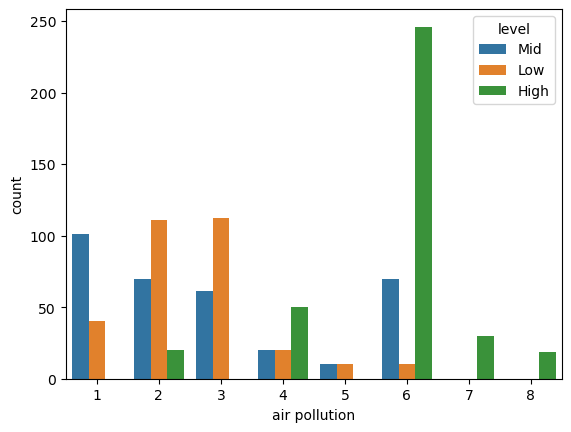

In [8]:
import seaborn as sns
sns.countplot(data = df, x='air pollution', hue='level')

# 3

dust allergy와 level 사이의 관련성을 알아봅니다.

df의 dust allergy 칼럼을 분리해서 pandas Series 형태로 dust 변수에 저장하세요. 
df의 level 칼럼을 분리해서 pandas Series 형태로 level 변수에 저장하세요. 두 시리즈를 crosstab 함수의 x, y에 활용하세요.

pandas의 crosstab 함수를 활용하세요.
x축(index) : dust allergy
y축(columns) : level
dropna : True
crosstab의 결과에서

열의 순서를 Low, Mid, High 으로 바꾸세요.
행의 순서를 Low, Mid, High 으로 바꾸세요.
corr 변수에 결과 저장

In [17]:
dust = df['dust allergy']
level = df['level']

corr = pd.crosstab(index = dust, columns = level, dropna=True)
#dropna=True - NaN이 포함된 행/열 제거
corr

order = ['Low', 'Mid', 'High']
corr = corr.reindex(index = order, columns = order)
corr

level,Low,Mid,High
dust allergy,,,
Low,180,41,10
Mid,113,161,80
High,10,130,275


# 4

레벨 별 dust allergy의 비율을 계산하세요

corr로부터 level별 합을 열 방향으로 구하여 total 변수에 저장하세요
corr를 total로 나누어 rate 변수에 저장하세요.

In [19]:
total = corr.sum(axis=0)
rate = corr / total

print(total)
print(rate)

level
Low     303
Mid     332
High    365
dtype: int64
level              Low       Mid      High
dust allergy                              
Low           0.594059  0.123494  0.027397
Mid           0.372937  0.484940  0.219178
High          0.033003  0.391566  0.753425


# 5

앞서 저장한 rate 변수를 heatmap으로 그리세요

seaborn heatmap 함수 활용
데이터 텍스트 표현 (annot) : True
텍스트 형식(fmt) : '.2f'
heatmap의 리턴값을 ax로 저장 후 옵션 적용

X축 라벨(xlabel) : 'LEVEL'
y축 라벨(ylabel) : 'DUST ALLERGY'

Text(50.722222222222214, 0.5, 'DUST ALLERGY')

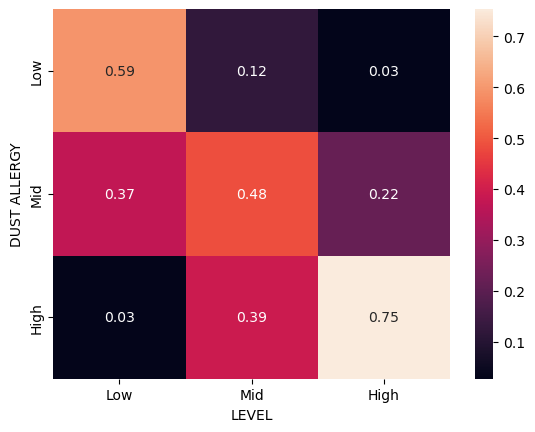

In [22]:
import seaborn as sns
ax = sns.heatmap(data = rate, annot = True, fmt='.2f')
ax.set_xlabel('LEVEL')
ax.set_ylabel('DUST ALLERGY')

# 6

불필요한 데이터를 삭제합니다.

patient id 칼럼을 삭제
처리 결과를 df2에 저장

In [25]:
df2 = df.drop(columns = ['patient id'])
df2

,age,gender,air pollution,alcohol use,dust allergy,occupational hazards,genetic risk,chronic lung disease,balanced diet,obesity,smoking,passive smoker,chest pain,level
0,33,1,2,Mid,Mid,4.0,3.0,2.0,2,4,3,2,2,Low
1,17,1,3,Low,Mid,3.0,4.0,2.0,2,2,2,4,2,Mid
2,35,1,4,Mid,Mid,5.0,5.0,4.0,6,7,2,3,4,High
3,37,1,7,High,High,7.0,6.0,7.0,7,7,7,7,7,High
4,46,1,6,High,High,7.0,7.0,6.0,7,7,8,7,7,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,High,High,7.0,7.0,6.0,7,7,7,8,7,High
996,37,2,6,High,High,7.0,7.0,6.0,7,7,7,8,7,High
997,25,2,4,Mid,Mid,5.0,5.0,4.0,6,7,2,3,4,High
998,18,2,6,High,High,7.0,7.0,6.0,7,7,8,7,7,High


# 7

결측치를 처리합니다.

object타입의 범주형 데이터 결측치에는 'Unknown'을 넣으세요
수치형 데이터의 결측치는 제거하세요.
쳐리 결과를 df3에 저장

In [ ]:
df2.info()

# 'alcohol use', 'dust allergy', 'level'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   1000 non-null   int64  
 1   gender                1000 non-null   int64  
 2   air pollution         1000 non-null   int64  
 3   alcohol use           986 non-null    object 
 4   dust allergy          1000 non-null   object 
 5   occupational hazards  993 non-null    float64
 6   genetic risk          997 non-null    float64
 7   chronic lung disease  992 non-null    float64
 8   balanced diet         1000 non-null   int64  
 9   obesity               1000 non-null   int64  
 10  smoking               1000 non-null   int64  
 11  passive smoker        1000 non-null   int64  
 12  chest pain            1000 non-null   int64  
 13  level                 1000 non-null   object 
dtypes: float64(3), int64(8), object(3)
memory usage: 109.5+ KB


In [ ]:
df2.isnull().sum()
#'occupational hazards', 'genetic risk', 'chronic lung disease'

age                      0
gender                   0
air pollution            0
alcohol use             14
dust allergy             0
occupational hazards     7
genetic risk             3
chronic lung disease     8
balanced diet            0
obesity                  0
smoking                  0
passive smoker           0
chest pain               0
level                    0
dtype: int64

In [ ]:
df3 = df2.copy()
df3[['alcohol use', 'dust allergy', 'level']] = df2[['alcohol use', 'dust allergy', 'level']].fillna('Unknown')
# obj_cols = df3.select_dtypes(include='object').columns
# df3[obj_cols] = df3[obj_cols].fillna('Unknown')

df3 = df3.dropna(axis = 0)

df3.isnull().sum()

age                     0
gender                  0
air pollution           0
alcohol use             0
dust allergy            0
occupational hazards    0
genetic risk            0
chronic lung disease    0
balanced diet           0
obesity                 0
smoking                 0
passive smoker          0
chest pain              0
level                   0
dtype: int64

# 8

level의 Low, Mid, High를 각각 0, 1, 2로 변환하여 level에 다시 저장하세요.

smoking열과 passive smoker열의 합을 구하여 total smoking 칼럼에 저장하세요.

처리 결과를 df4에 저장.

In [38]:
df4 = df3.copy()
df4['level'] = df2['level'].replace({'Low':0, 'Mid':1, 'High':2})
df4['total smoking'] = df2['smoking'] + df2['passive smoker'] 

C:\Users\KDT51\AppData\Local\Temp\ipykernel_17244\947486676.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df4['level'] = df2['level'].replace({'Low':0, 'Mid':1, 'High':2})


In [40]:
df4

,age,gender,air pollution,alcohol use,dust allergy,occupational hazards,genetic risk,chronic lung disease,balanced diet,obesity,smoking,passive smoker,chest pain,level,total smoking
0,33,1,2,Mid,Mid,4.0,3.0,2.0,2,4,3,2,2,0,5
1,17,1,3,Low,Mid,3.0,4.0,2.0,2,2,2,4,2,1,6
2,35,1,4,Mid,Mid,5.0,5.0,4.0,6,7,2,3,4,2,5
3,37,1,7,High,High,7.0,6.0,7.0,7,7,7,7,7,2,14
4,46,1,6,High,High,7.0,7.0,6.0,7,7,8,7,7,2,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,High,High,7.0,7.0,6.0,7,7,7,8,7,2,15
996,37,2,6,High,High,7.0,7.0,6.0,7,7,7,8,7,2,15
997,25,2,4,Mid,Mid,5.0,5.0,4.0,6,7,2,3,4,2,5
998,18,2,6,High,High,7.0,7.0,6.0,7,7,8,7,7,2,15


# 9
가이드에 따라 원-핫 인코딩을 수행합니다.

대상 : df4의 모든 범주형 데이터
활용 함수 : pandas 의 get_dummies
전처리가 반영된 결과를 df5에 저장하세요.

In [42]:
df5 = pd.get_dummies(df4)
df5

,age,gender,air pollution,occupational hazards,genetic risk,chronic lung disease,balanced diet,obesity,smoking,passive smoker,chest pain,level,total smoking,alcohol use_High,alcohol use_Low,alcohol use_Mid,alcohol use_Unknown,dust allergy_High,dust allergy_Low,dust allergy_Mid
0,33,1,2,4.0,3.0,2.0,2,4,3,2,2,0,5,False,False,True,False,False,False,True
1,17,1,3,3.0,4.0,2.0,2,2,2,4,2,1,6,False,True,False,False,False,False,True
2,35,1,4,5.0,5.0,4.0,6,7,2,3,4,2,5,False,False,True,False,False,False,True
3,37,1,7,7.0,6.0,7.0,7,7,7,7,7,2,14,True,False,False,False,True,False,False
4,46,1,6,7.0,7.0,6.0,7,7,8,7,7,2,15,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7.0,7.0,6.0,7,7,7,8,7,2,15,True,False,False,False,True,False,False
996,37,2,6,7.0,7.0,6.0,7,7,7,8,7,2,15,True,False,False,False,True,False,False
997,25,2,4,5.0,5.0,4.0,6,7,2,3,4,2,5,False,False,True,False,False,False,True
998,18,2,6,7.0,7.0,6.0,7,7,8,7,7,2,15,True,False,False,False,True,False,False


# 10

데이터를 입력 X와 타깃 y로 분리하시오.
y : level
X : level 외 컬럼
sklearn의 train_test_split 함수를 활용하여 학습데이터와 테스트 데이터로 분리하시오.
random_state : 42
학습데이터 80%, 훈련데이터 20%

In [ ]:
X = df5.drop(columns = ['level'])
y = df5['level']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42, test_size = 0.2)

# 11

RobustScaler를 활용하여 입력 데이터 X_train, X_test에 대한 스케일링을 진행하시오.
X_train : fit_transform 활용
X_test : transform 활용

In [45]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)